In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
DC = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

new_cmap = [ '#1F78B4', '#E31A1C', '#8660AF', '#FF7F50', '#17A589', '#AF7AC5']
rtg_r = LinearSegmentedColormap.from_list("rtg", new_cmap)
colors = rtg_r(np.linspace(0,1,6))

In [3]:
concs = [5, 10, 20, 30, 40]
phieff = 0.4
SPOP_type = 'WT_MATHfree'
Ka_exp = 0.42
reweighting = True
oligomersizes = range(2,61,2)
fitting_type = f'{SPOP_type}_reweighting_phieff{phieff}'

In [4]:
os.system(f'mkdir plots/{fitting_type}')

mkdir: cannot create directory ‘plots/WT_MATHfree_reweighting_phieff0.4’: File exists


256

In [5]:
def get_chi2(Iaverage_sim, I_exp, err_exp):
    
    chi2 = np.average(np.square((Iaverage_sim-I_exp)/err_exp))
    
    return chi2

# Plot optimization

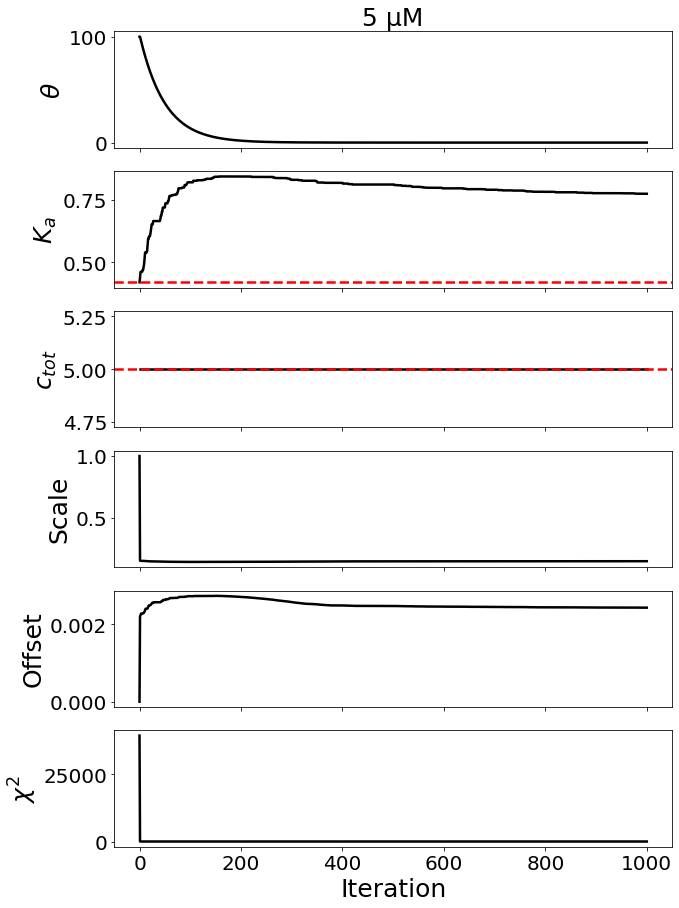

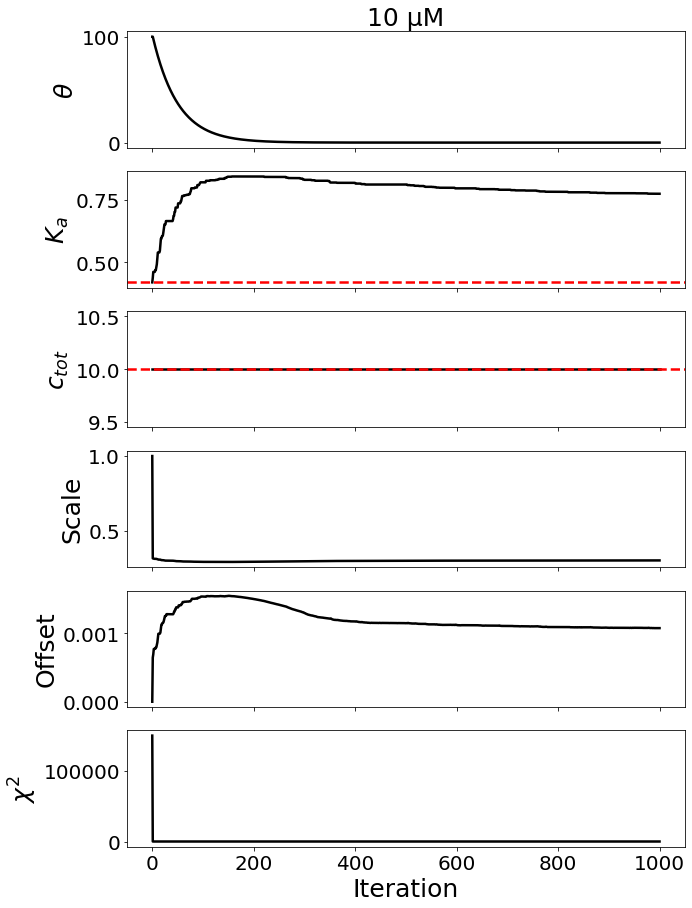

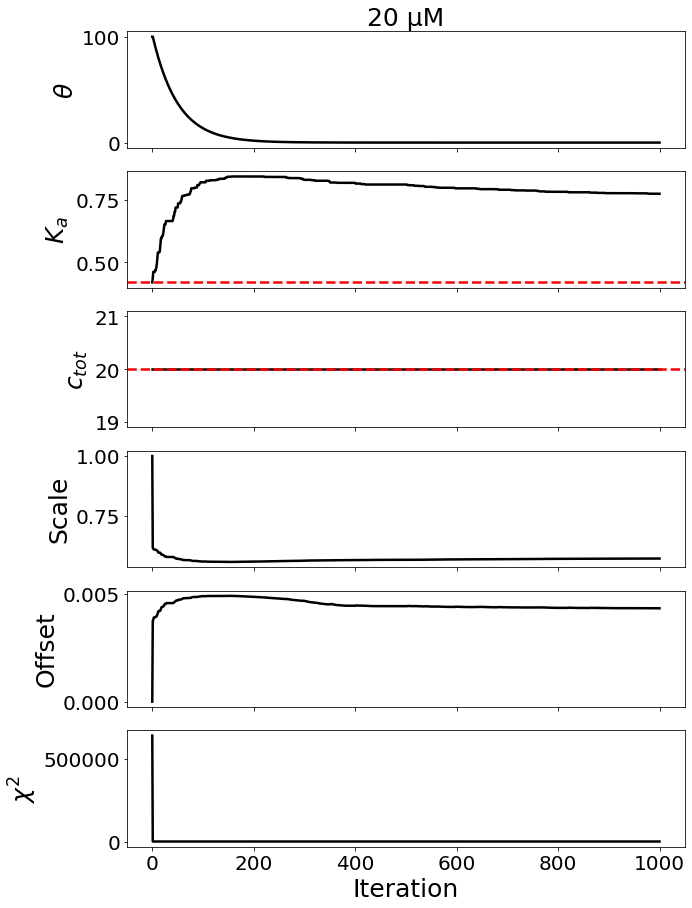

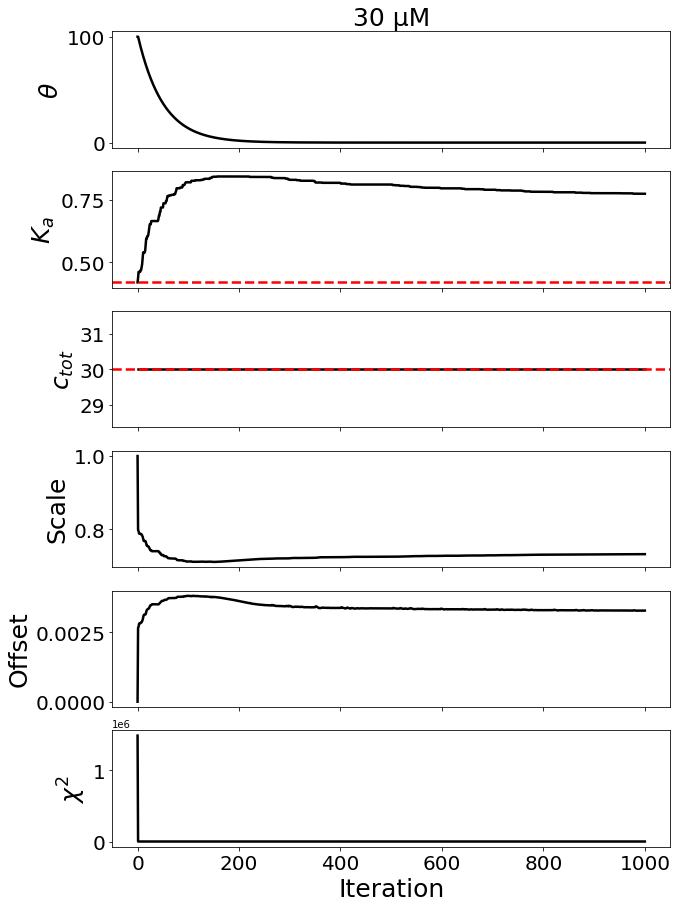

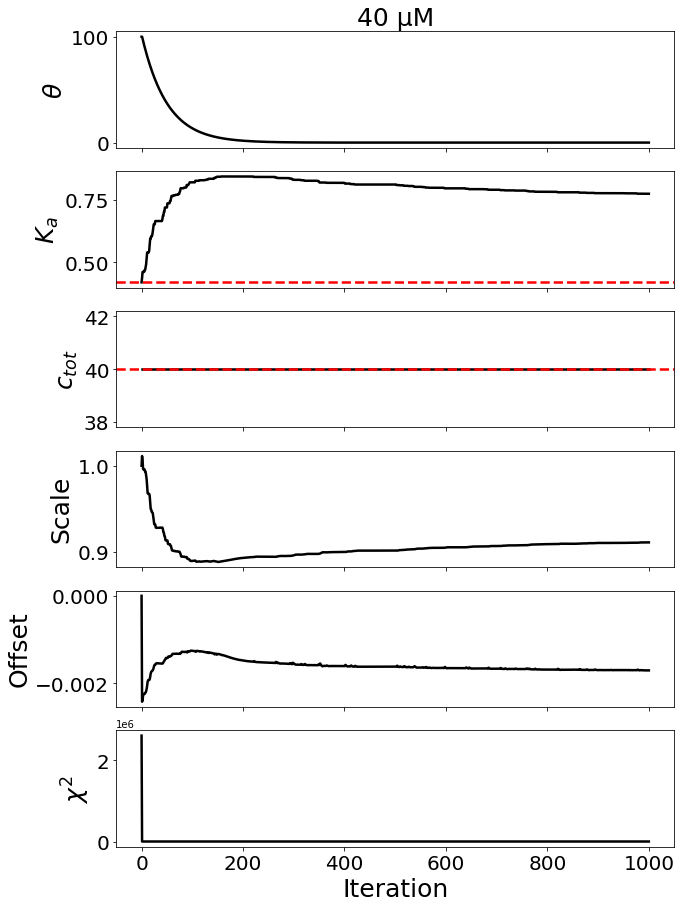

In [6]:
if reweighting == True:
    for conc in concs:
        chi2, Ka, ctot, theta, scale, offset = np.genfromtxt(f'{fitting_type}/{conc}.0_uM_outfiles/optimization.log', skip_header=1, usecols=(1,2,3,4,5,6), unpack=True)

        fig, ax = plt.subplots(figsize=(10,15), nrows=6, sharex='col')

        ax[0].set_title(f'{conc} µM', fontsize=25, color='black')

        ax[0].plot(theta, color="black", linewidth=2.5) 
        ax[0].tick_params(axis='both', which='major', labelsize=20)
        ax[0].set_ylabel('$θ$', fontsize=25, color='black')

        ax[1].plot(Ka, color="black", linewidth=2.5) 
        ax[1].tick_params(axis='both', which='major', labelsize=20)
        ax[1].set_ylabel('$K_{a}$', fontsize=25, color='black')
        ax[1].axhline(Ka_exp, linewidth=2.5, ls='--', color='red')

        ax[2].plot(ctot, color="black", linewidth=2.5) 
        ax[2].tick_params(axis='both', which='major', labelsize=20)
        ax[2].set_ylabel('$c_{tot}$', fontsize=25, color='black')
        ax[2].axhline(conc, linewidth=2.5, ls='--', color='red')

        ax[3].plot(scale, color="black", linewidth=2.5) 
        ax[3].tick_params(axis='both', which='major', labelsize=20)
        ax[3].set_ylabel('Scale', fontsize=25, color='black')

        ax[4].plot(offset, color="black", linewidth=2.5) 
        ax[4].tick_params(axis='both', which='major', labelsize=20)
        ax[4].set_ylabel('Offset', fontsize=25, color='black')

        ax[5].plot(chi2, color='black', linewidth=2.5)
        ax[5].set_ylabel('$χ^{2}$', fontsize=25, color='black')
        ax[5].tick_params(axis='both', which='major', labelsize=20)

        ax[5].set_xlabel('Iteration', fontsize=25)

        fig.savefig(f'plots/{fitting_type}/optimization_{conc}uM.pdf', bbox_inches='tight', pad_inches=1)
        fig.savefig(f'plots/{fitting_type}/optimization_{conc}uM.png', bbox_inches='tight', pad_inches=1)

        
elif reweighting == False:
    
    for conc in concs:
        
        chi2, Ka, ctot, scale, offset = np.genfromtxt(f'{fitting_type}/{conc}.0_uM_outfiles/optimization.log', skip_header=1, usecols=(1,2,3,4,5), unpack=True)

        fig, ax = plt.subplots(figsize=(10,15), nrows=5, sharex='col')

        ax[0].set_title(f'{conc} µM', fontsize=25, color='black')

        ax[0].plot(Ka, color="black", linewidth=2.5) 
        ax[0].tick_params(axis='both', which='major', labelsize=20)
        ax[0].set_ylabel('$K_{a}$', fontsize=25, color='black')
        ax[0].axhline(Ka_exp, linewidth=2.5, ls='--', color='red')

        ax[1].plot(ctot, color="black", linewidth=2.5) 
        ax[1].tick_params(axis='both', which='major', labelsize=20)
        ax[1].set_ylabel('$c_{tot}$', fontsize=25, color='black')
        ax[1].axhline(conc, linewidth=2.5, ls='--', color='red')

        ax[2].plot(scale, color="black", linewidth=2.5) 
        ax[2].tick_params(axis='both', which='major', labelsize=20)
        ax[2].set_ylabel('Scale', fontsize=25, color='black')

        ax[3].plot(offset, color="black", linewidth=2.5) 
        ax[3].tick_params(axis='both', which='major', labelsize=20)
        ax[3].set_ylabel('Offset', fontsize=25, color='black')

        ax[4].plot(chi2, color='black', linewidth=2.5)
        ax[4].set_ylabel('$χ^{2}$', fontsize=25, color='black')
        ax[4].tick_params(axis='both', which='major', labelsize=20)

        ax[4].set_xlabel('Iteration', fontsize=25)

        fig.savefig(f'plots/{fitting_type}/optimization_{conc}uM.pdf', bbox_inches='tight', pad_inches=1)
        fig.savefig(f'plots/{fitting_type}/optimization_{conc}uM.png', bbox_inches='tight', pad_inches=1)
        


# SAXS before/after comparison

In [7]:
os.system(f'mkdir plots/{SPOP_type}_SAXS')

mkdir: cannot create directory ‘plots/WT_MATHfree_SAXS’: File exists


256

Global chi2 fitting scale and offset only: 2.218840448416864
Global chi2 also fitting Ka: 1.2358730482404565
Global chi2 also reweighting: 0.6922652249161486


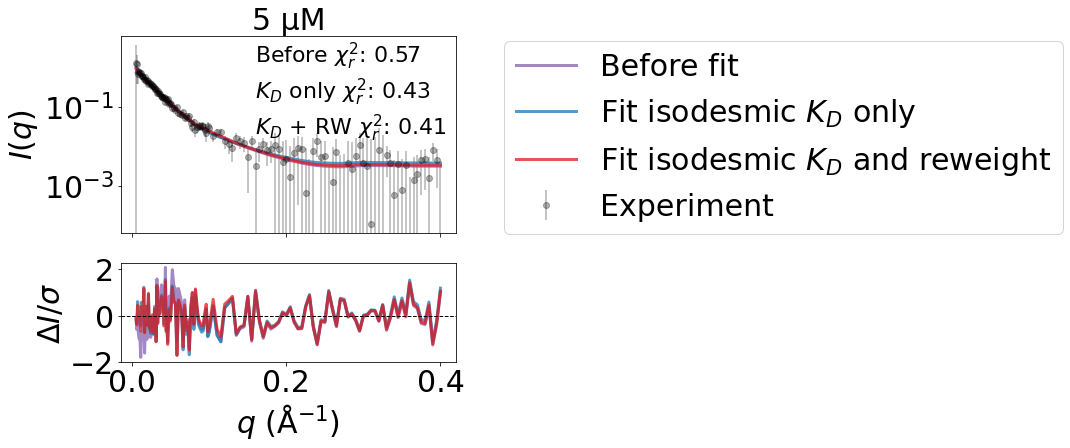

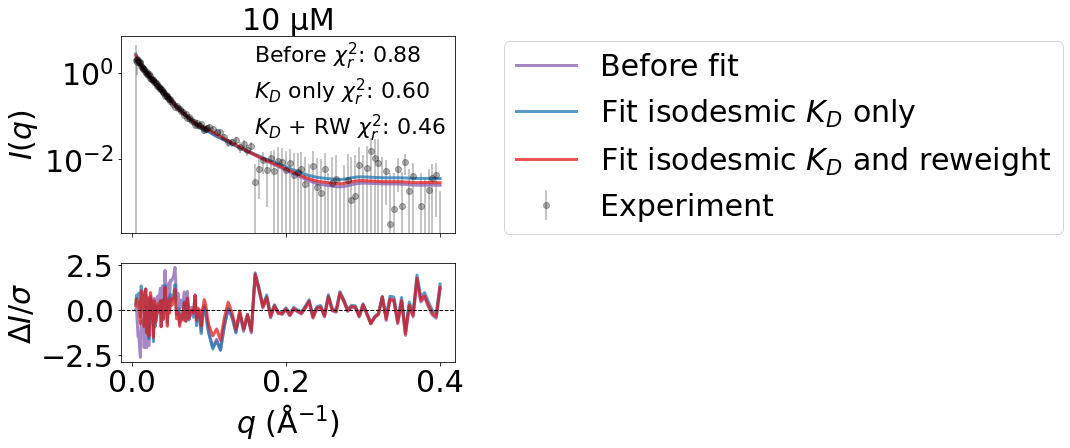

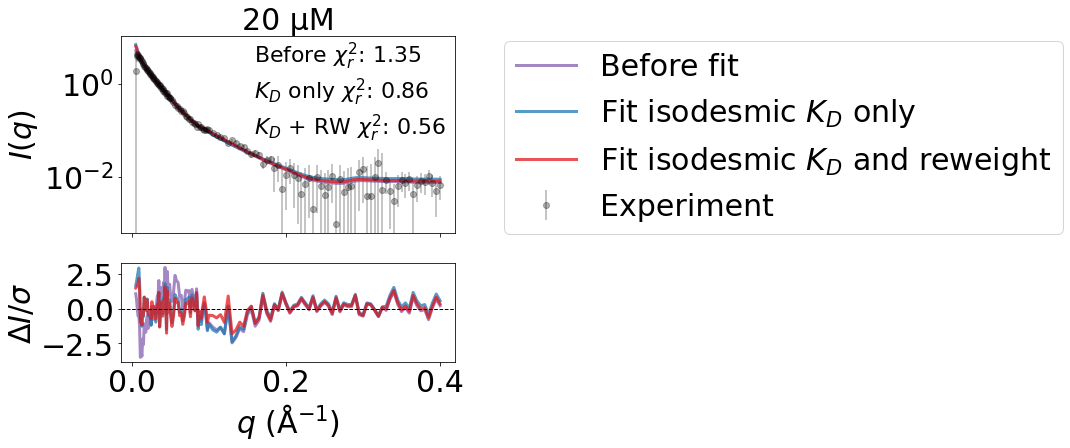

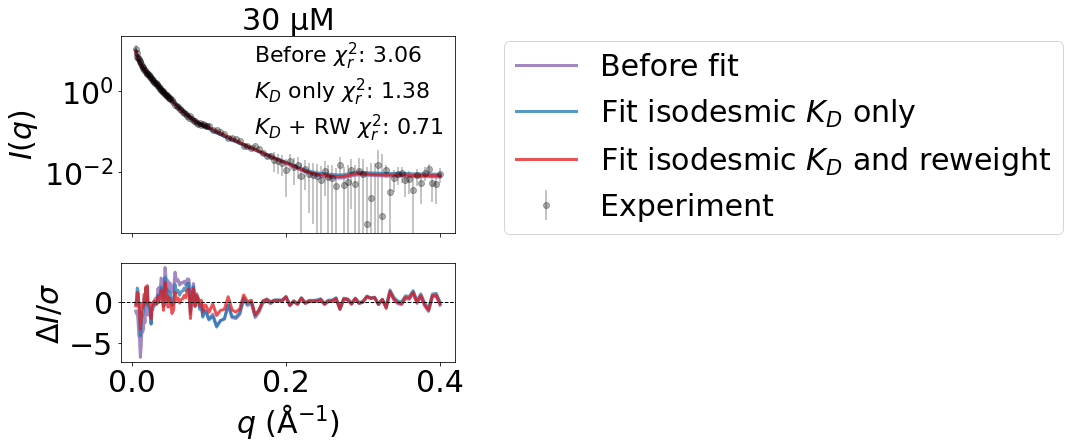

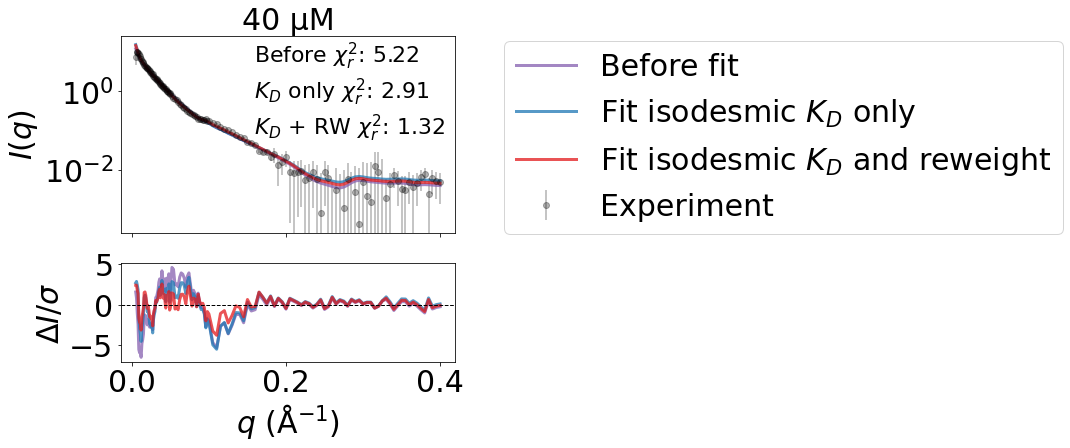

In [8]:
#chi2 for running sum and average
chi2_scaleoffset_global = 0.0
chi2_Ka_global = 0.0
chi2_reweighting_global = 0.0

for conc in concs:
    
    #Plot SAXS Iaverage and residuals before and after reweighting
    q, Iexp, Ierr, Ifit_avg_scaleoffset = np.genfromtxt(f'{SPOP_type}_scaleoffsetonly/{conc}.0_uM_outfiles/SAXS_Iaverage.dat', skip_header=1, usecols=(0,1,2,5), unpack=True)
    Ifit_avg_Ka = np.genfromtxt(f'{SPOP_type}_noreweighting/{conc}.0_uM_outfiles/SAXS_Iaverage.dat', skip_header=1, usecols=(5), unpack=True)
    Ifit_avg_reweighting = np.genfromtxt(f'{SPOP_type}_reweighting_phieff{phieff}/{conc}.0_uM_outfiles/SAXS_Iaverage.dat', skip_header=1, usecols=(5), unpack=True)
    
    #Get residuals
    Residuals_scaleoffset = (Ifit_avg_scaleoffset - Iexp)/Ierr
    Residuals_Ka = (Ifit_avg_Ka - Iexp)/Ierr
    Residuals_reweighting = (Ifit_avg_reweighting - Iexp)/Ierr

    #Get chi2
    chi2_scaleoffset = get_chi2(Ifit_avg_scaleoffset, Iexp, Ierr)
    chi2_Ka = get_chi2(Ifit_avg_Ka, Iexp, Ierr)
    chi2_reweighting = get_chi2(Ifit_avg_reweighting, Iexp, Ierr)
    
    #Add to running sum
    chi2_scaleoffset_global += chi2_scaleoffset
    chi2_Ka_global += chi2_Ka
    chi2_reweighting_global += chi2_reweighting
    
    #plot
    fig, ax = plt.subplots(figsize = (6,6), nrows=2, sharex='col', sharey='row', gridspec_kw={'height_ratios': [4, 2]})

    ax[0].set_title(f'{conc} µM', fontsize=30)

    ax[0].errorbar(q, Iexp, yerr=Ierr, fmt='o', markersize=6, color='black', alpha=0.3, label='Experiment')
    ax[0].plot(q, Ifit_avg_scaleoffset, linewidth=3, label="Before fit", alpha=0.75, color=colors[2])
    ax[0].plot(q, Ifit_avg_Ka, linewidth=3, label="Fit isodesmic $K_D$ only", alpha=0.75, color=colors[0])
    ax[0].plot(q, Ifit_avg_reweighting, linewidth=3, label="Fit isodesmic $K_D$ and reweight", alpha=0.75, color=colors[1])
    ax[0].semilogy()
    ax[0].set_ylabel('$I(q)$', fontsize=30)
    
    ax[0].legend(fontsize=30, ncol=1, bbox_to_anchor=(1.1, 1.05))
    ax[0].text(0.40,0.50, f'Before $χ^2_r$: {chi2_scaleoffset:.2f} \n$K_D$ only $χ^2_r$: {chi2_Ka:.2f} \n$K_D$ + RW $χ^2_r$: {chi2_reweighting:.2f}', fontsize=22, transform=ax[0].transAxes)

    for j in range(len(ax)):
        ax[j].tick_params(axis='both', which='major', labelsize=30)

    ax[1].plot(q, Residuals_scaleoffset, linewidth=3, color= colors[2], alpha=0.75)
    ax[1].plot(q, Residuals_Ka, linewidth=3, color= colors[0], alpha=0.75)
    ax[1].plot(q, Residuals_reweighting, linewidth=3, color= colors[1], alpha=0.75)

    ax[1].set_ylabel('$ΔI/σ$', fontsize=30)
    ax[1].set_xlabel('$q$ (Å$^{-1}$)', fontsize=30)
    ax[1].axhline(0, ls='--', linewidth=1, color='black')

    fig.savefig(f'plots/{SPOP_type}_SAXS/SAXS_before_after_phieff{phieff}_{conc}uM.png', bbox_inches='tight', pad_inches=1)
    fig.savefig(f'plots/{SPOP_type}_SAXS/SAXS_before_after_phieff{phieff}_{conc}uM.pdf', bbox_inches='tight', pad_inches=1)

#Get global average chi2
chi2_scaleoffset_global /= len(concs)
chi2_Ka_global /= len(concs)
chi2_reweighting_global /= len(concs)

print('Global chi2 fitting scale and offset only: ' + str(chi2_scaleoffset_global))
print('Global chi2 also fitting Ka: ' + str(chi2_Ka_global))
print('Global chi2 also reweighting: ' + str(chi2_reweighting_global))

# SAXS MATHfree vs MATHfixed

In [9]:
variant = 'WT'

mkdir: cannot create directory ‘plots/WT_MATHfree_MATHfixed_comparison_SAXS’: File exists


Global chi2 MATHfree: 1.2358730482404565
Global chi2 MATHfixed: 4.376587869662063


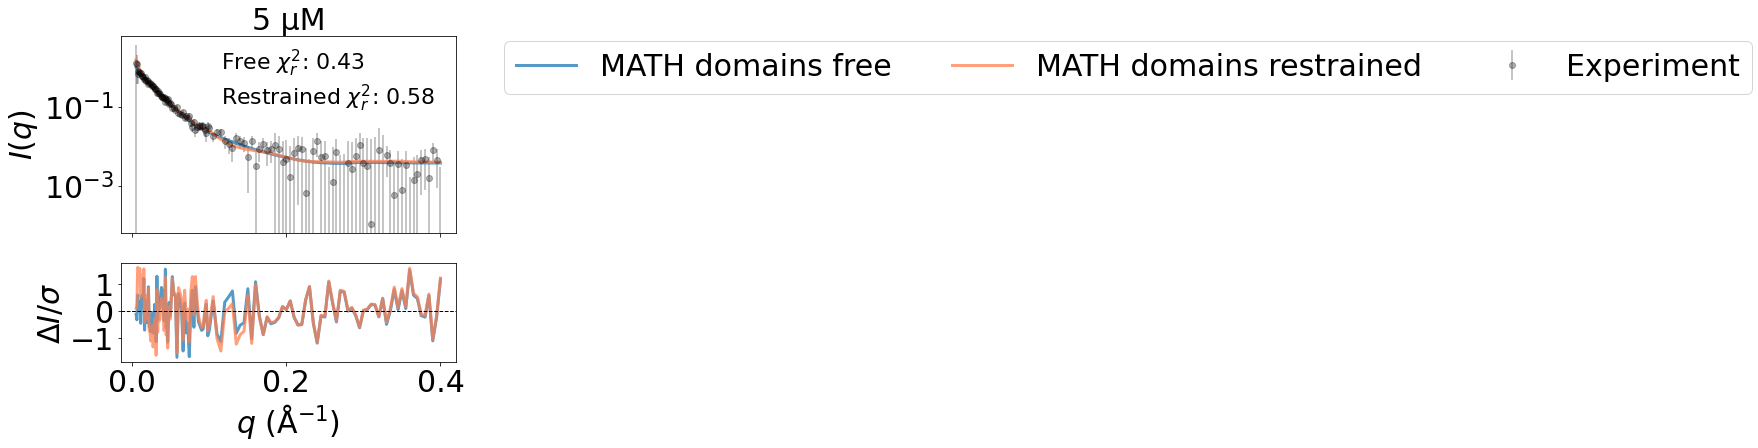

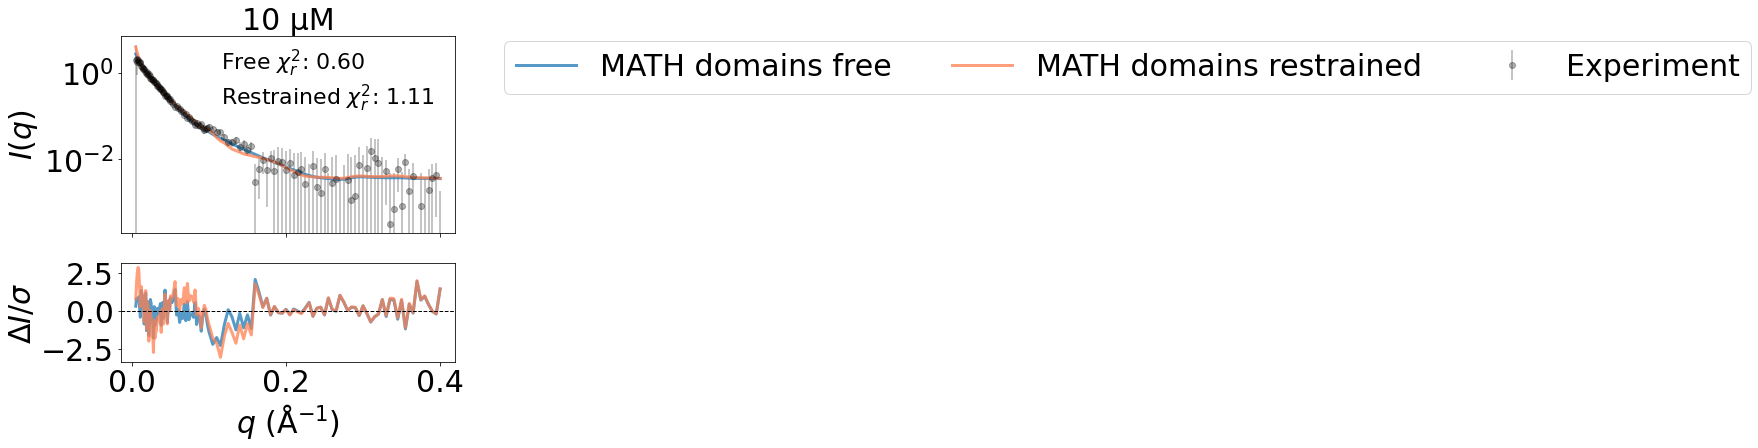

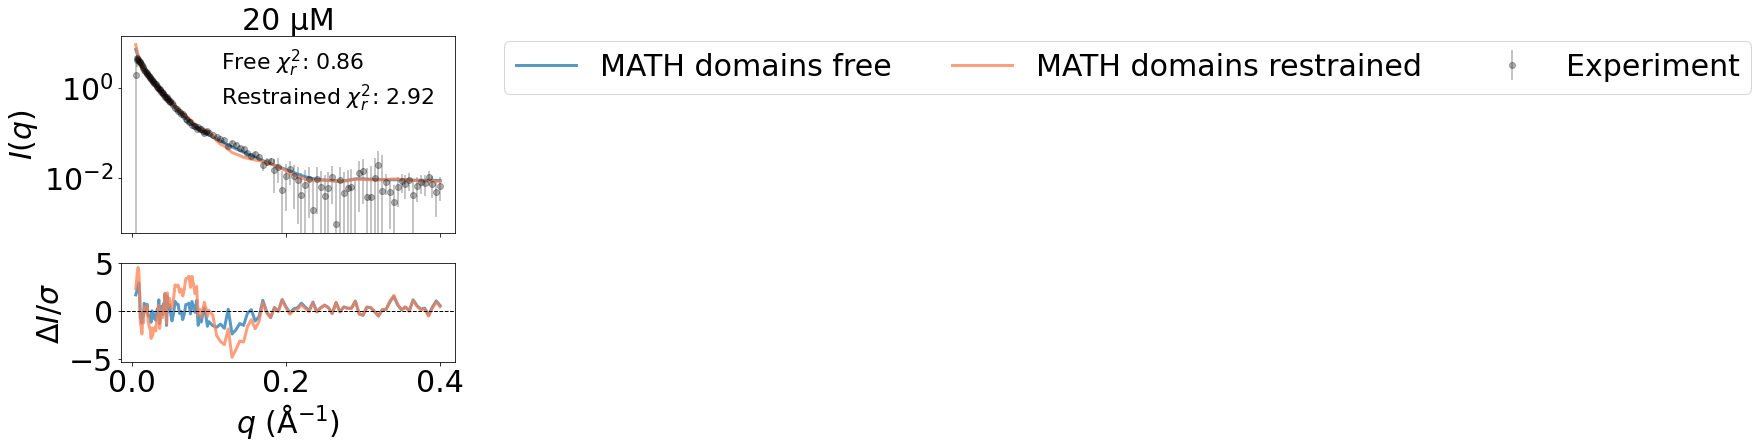

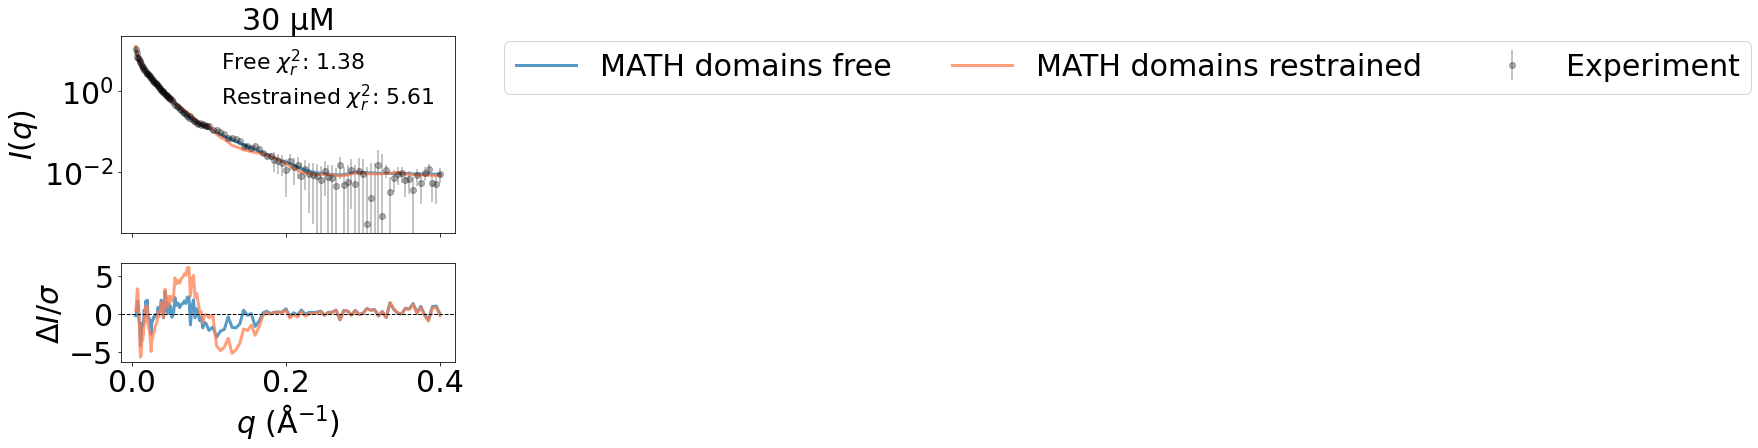

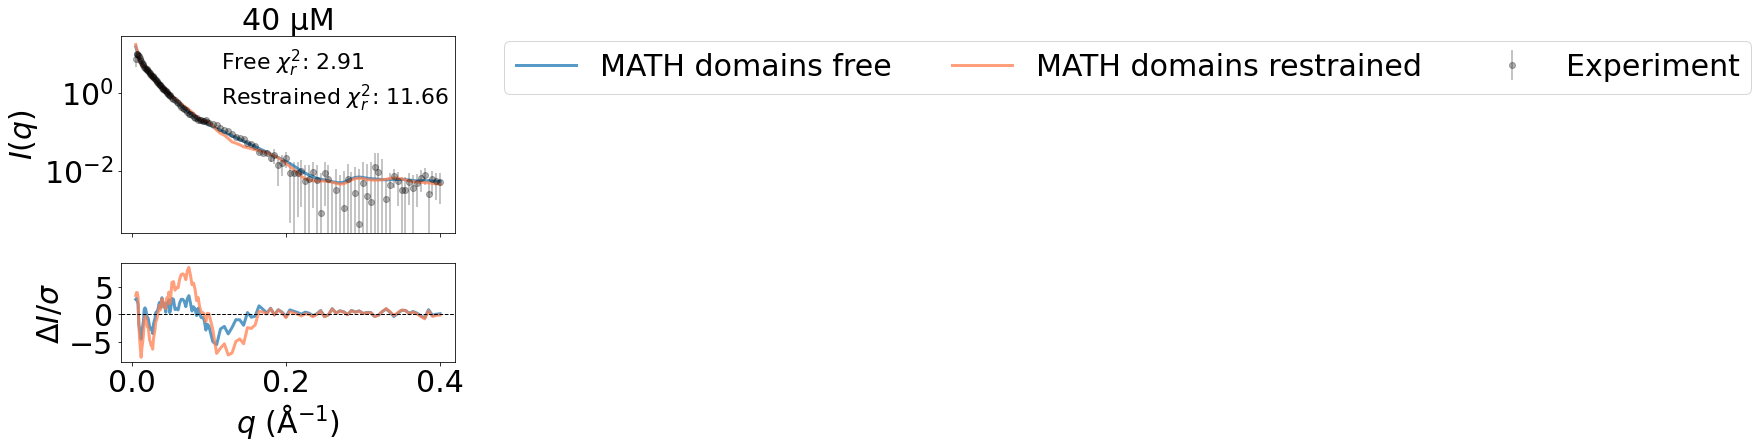

In [10]:
os.system(f'mkdir plots/{variant}_MATHfree_MATHfixed_comparison_SAXS')

#chi2 for running sum and average
chi2_global_MATHfree = 0.0
chi2_global_MATHfixed = 0.0

for conc in concs:
    
    #Get SAXS Iaverage and residuals
    q, Iexp, Ierr, Ifit_avg_scaleoffset = np.genfromtxt(f'{SPOP_type}_scaleoffsetonly/{conc}.0_uM_outfiles/SAXS_Iaverage.dat', skip_header=1, usecols=(0,1,2,5), unpack=True)
    Ifit_avg_MATHfree = np.genfromtxt(f'{variant}_MATHfree_noreweighting/{conc}.0_uM_outfiles/SAXS_Iaverage.dat', skip_header=1, usecols=(5), unpack=True)
    Ifit_avg_MATHfixed = np.genfromtxt(f'{variant}_MATHfixed_noreweighting/{conc}.0_uM_outfiles/SAXS_Iaverage.dat', skip_header=1, usecols=(5), unpack=True)
    
    #Get residuals
    Residuals_MATHfree = (Ifit_avg_MATHfree - Iexp)/Ierr
    Residuals_MATHfixed = (Ifit_avg_MATHfixed - Iexp)/Ierr
    
    #Get chi2
    chi2_MATHfree = get_chi2(Ifit_avg_MATHfree, Iexp, Ierr)
    chi2_MATHfixed = get_chi2(Ifit_avg_MATHfixed, Iexp, Ierr)
    
    #Add to running sum
    chi2_global_MATHfree += chi2_MATHfree
    chi2_global_MATHfixed += chi2_MATHfixed
    
    #Plot
    fig, ax = plt.subplots(figsize = (6,6), nrows=2, sharex='col', sharey='row', gridspec_kw={'height_ratios': [4, 2]})

    ax[0].set_title(f'{conc} µM', fontsize=30)

    ax[0].errorbar(q, Iexp, yerr=Ierr, fmt='o', markersize=6, color='black', alpha=0.3, label='Experiment')
    ax[0].plot(q, Ifit_avg_MATHfree, linewidth=3, label="MATH domains free", alpha=0.75, color=colors[0])
    ax[0].plot(q, Ifit_avg_MATHfixed, linewidth=3, label="MATH domains restrained", alpha=0.75, color=colors[3])
    ax[0].semilogy()
    ax[0].set_ylabel('$I(q)$', fontsize=30)
    
    ax[0].legend(fontsize=30, ncol=3, bbox_to_anchor=(1.1, 1.05))
    ax[0].text(0.3,0.65, f'Free $χ^2_r$: {chi2_MATHfree:.2f}\nRestrained $χ^2_r$: {chi2_MATHfixed:.2f}', fontsize=22, transform=ax[0].transAxes)

    for j in range(len(ax)):
        ax[j].tick_params(axis='both', which='major', labelsize=30)

    ax[1].plot(q, Residuals_MATHfree, linewidth=3, alpha=0.75, color=colors[0])
    ax[1].plot(q, Residuals_MATHfixed, linewidth=3, alpha=0.75, color=colors[3])

    ax[1].set_ylabel('$ΔI/σ$', fontsize=30)
    ax[1].set_xlabel('$q$ (Å$^{-1}$)', fontsize=30)
    ax[1].axhline(0, ls='--', linewidth=1, color='black')

    fig.savefig(f'plots/{variant}_MATHfree_MATHfixed_comparison_SAXS/SAXS_MATHfree_MATHfixed_{conc}.png', bbox_inches='tight', pad_inches=1)
    fig.savefig(f'plots/{variant}_MATHfree_MATHfixed_comparison_SAXS/SAXS_MATHfree_MATHfixed_{conc}.pdf', bbox_inches='tight', pad_inches=1)

#Get global average chi2
chi2_global_MATHfree /= len(concs)
chi2_global_MATHfixed /= len(concs)

print('Global chi2 MATHfree: ' + str(chi2_global_MATHfree))
print('Global chi2 MATHfixed: ' + str(chi2_global_MATHfixed))